## Time Series Visualizer Scratchwork

In [371]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [372]:
df = pd.read_csv("fcc-forum-pageviews.csv",
                 parse_dates=True,
                 index_col="date")
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [373]:
outliers_mask = (df["value"] > df["value"].quantile(0.025)) & (df["value"] < df["value"].quantile(0.975))
df = df[outliers_mask]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

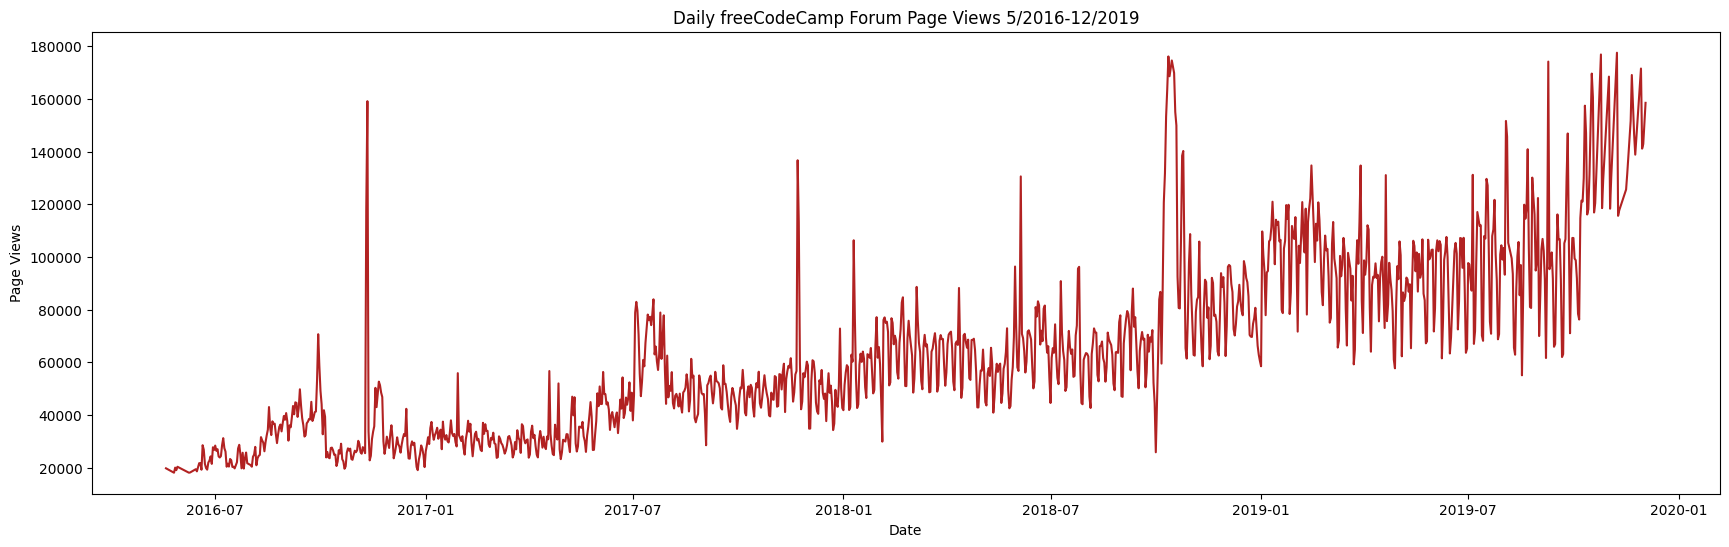

In [374]:
fig, axes = plt.subplots(figsize=(21, 6))

axes.plot(df, color="firebrick", linewidth=1.5)
axes.set_xlabel("Date")
axes.set_ylabel("Page Views")
axes.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

In [375]:
df_bar = df.copy() # need to do groupby() or resample() here probably (by month) - ***maybe I can just use sns.catplot()***
df_bar

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [376]:
# resample or groupby first
df_yearly = df_bar.resample("ME").mean().rename(columns={"value": "Average Page Views"})
# fig = sns.catplot(df_bar, kind="bar", x="Year")
df_yearly

,Average Page Views
date,
2016-05-31,19432.400000
2016-06-30,21875.105263
2016-07-31,24109.678571
2016-08-31,31049.193548
2016-09-30,41476.866667
2016-10-31,27398.322581
2016-11-30,40448.633333
2016-12-31,27832.419355
2017-01-31,32785.161290


In [377]:
df_yearly.reset_index(inplace=True)
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                44 non-null     datetime64[ns]
 1   Average Page Views  44 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 836.0 bytes


In [378]:
df_yearly

,date,Average Page Views
0,2016-05-31,19432.400000
1,2016-06-30,21875.105263
2,2016-07-31,24109.678571
3,2016-08-31,31049.193548
4,2016-09-30,41476.866667
5,2016-10-31,27398.322581
6,2016-11-30,40448.633333
7,2016-12-31,27832.419355
8,2017-01-31,32785.161290
9,2017-02-28,31113.071429


In [379]:
df_yearly["month"] = df_yearly["date"].dt.strftime("%B")
df_yearly

,date,Average Page Views,month
0,2016-05-31,19432.400000,May
1,2016-06-30,21875.105263,June
2,2016-07-31,24109.678571,July
3,2016-08-31,31049.193548,August
4,2016-09-30,41476.866667,September
5,2016-10-31,27398.322581,October
6,2016-11-30,40448.633333,November
7,2016-12-31,27832.419355,December
8,2017-01-31,32785.161290,January
9,2017-02-28,31113.071429,February


In [380]:
df_yearly["year"] = df_yearly["date"].dt.strftime("%Y")
df_yearly

,date,Average Page Views,month,year
0,2016-05-31,19432.400000,May,2016
1,2016-06-30,21875.105263,June,2016
2,2016-07-31,24109.678571,July,2016
3,2016-08-31,31049.193548,August,2016
4,2016-09-30,41476.866667,September,2016
5,2016-10-31,27398.322581,October,2016
6,2016-11-30,40448.633333,November,2016
7,2016-12-31,27832.419355,December,2016
8,2017-01-31,32785.161290,January,2017
9,2017-02-28,31113.071429,February,2017


In [381]:
# df_counts = df_yearly.groupby(["year", "month"]).value_counts().to_frame().rename(columns={"count": "Average Page Views"})
df_counts = df_yearly.groupby(["year", "month"], sort=False).value_counts().to_frame().reset_index(["Average Page Views", "date"])
df_counts.drop(["count", "date"], axis=1, inplace=True)
# df_counts = df_counts.sort_index(level=["year", "month"])
df_counts

Average Page Views
year month                        
2016 May              19432.400000
     June             21875.105263
     July             24109.678571
     August           31049.193548
     September        41476.866667
     October          27398.322581
     November         40448.633333
     December         27832.419355
2017 January          32785.161290
     February         31113.071429
     March            29369.096774
     April            30878.733333
     May              34244.290323
     June             43577.500000
     July             65806.838710
     August           47712.451613
     September        47376.800000
     October          47438.709677
     November         57701.566667
     December         48420.580645
2018 January          58580.096774
     February         65679.000000
     March            62693.774194
     April            62350.833333
     May              56562.870968
     June             70117.000000
     July             63591.064516
     August           62831.612903
     September        65941.733333
     October         111378.142857
     November         78688.333333
     December         80047.483871
2019 January         102056.516129
     February        105968.357143
     March            91214.483871
     April            89368.433333
     May              91439.903226
     June             90435.642857
     July             97236.566667
     August          102717.310345
     September        97268.833333
     October         122802.272727
     November        143166.428571
     December        150733.500000

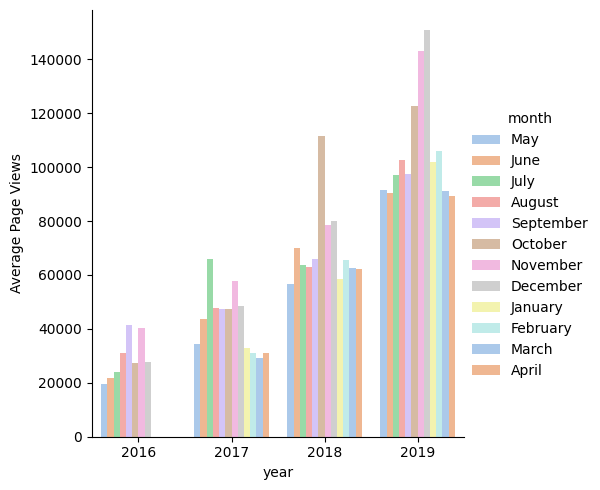

In [382]:
# fig, ax = plt.subplots(figsize=(10, 10))

# ax.bar(df_bar, barwidth=0.5)

palette = sns.color_palette("viridis", as_cmap=False, n_colors=6)
fig = sns.catplot(df_counts, kind="bar", x="year", hue="month", y="Average Page Views", palette="pastel")
fig

In [386]:
len([rect for rect in fig.axes[0][0].get_children() if isinstance(rect, mpl.patches.Rectangle)])
fig.axes[0][0].get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [335]:
long_data = df_counts.reset_index()
long_data

,year,month,Average Page Views
0,2016,May,19432.400000
1,2016,June,21875.105263
2,2016,July,24109.678571
3,2016,August,31049.193548
4,2016,September,41476.866667
5,2016,October,27398.322581
6,2016,November,40448.633333
7,2016,December,27832.419355
8,2017,January,32785.161290
9,2017,February,31113.071429


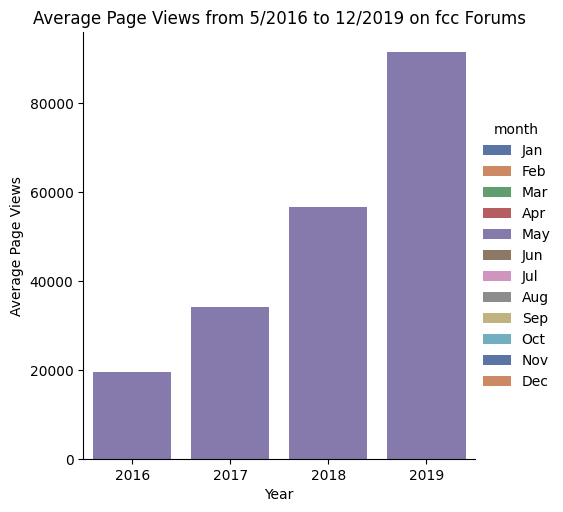

In [336]:
month_order = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]
long_data["month"] = pd.Categorical(long_data["month"], categories=month_order, ordered=True)

sns.catplot(
    data=long_data,
    x="year",
    y="Average Page Views",
    hue="month",
    kind="bar",
    palette="deep"
)

plt.title("Average Page Views from 5/2016 to 12/2019 on fcc Forums")
plt.ylabel("Average Page Views")
plt.xlabel("Year")
plt.show()

In [337]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [338]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box

,date,value
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325
...,...,...
1233,2019-11-24,138875
1234,2019-11-29,171584
1235,2019-11-30,141161
1236,2019-12-01,142918


In [339]:
df_box.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1238 non-null   datetime64[ns]
 1   value   1238 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.5 KB


In [340]:
df_box["Year"] = [d.year for d in df_box.date]
df_box["Month"] = [d.strftime("%b") for d in df_box.date]
df_box.rename(columns={"value": "Page Views"}, inplace=True)
df_box["Year"] = pd.Categorical(df_box["Year"])
df_box["Month"] = pd.Categorical(df_box["Month"], categories=month_order, ordered=True)

df_box

,date,Page Views,Year,Month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


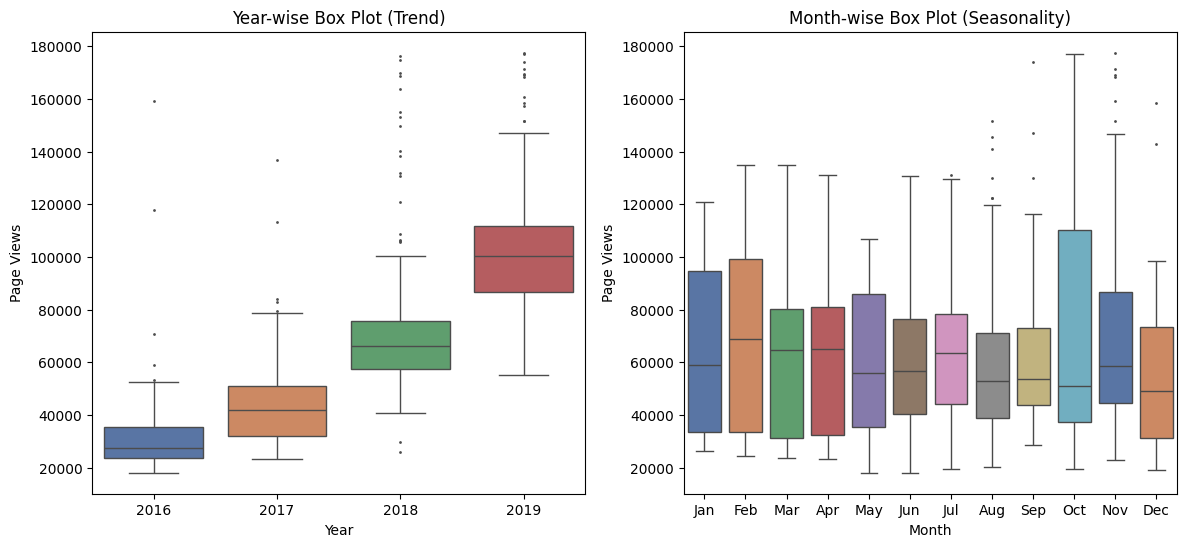

In [341]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

flierprops = {
    "marker": "o",
    "markerfacecolor": "None",
    "markersize": 1,
}

sns.boxplot(data=df_box, x="Year", y="Page Views", ax=ax1, flierprops=flierprops, palette="deep", hue="Year", legend=False)
sns.boxplot(data=df_box, x="Month", y="Page Views", ax=ax2, flierprops=flierprops, palette="deep", hue="Month", legend=False)

ax1.set_title("Year-wise Box Plot (Trend)")
ax2.set_title("Month-wise Box Plot (Seasonality)")

plt.show()